### Chapter 3 Exercise 10

In [1]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
# import data visualisation tools
import xkcd
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 10)

In [3]:
# import and view first 10 items of file
# url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Carseats.csv"
url = "../../Data/Carseats.csv"
CarSeats = pd.read_csv(url)

In [4]:
CarSeats.head()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
list(CarSeats)

['SlNo',
 'Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [6]:
CarSeats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SlNo         400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [7]:
# count 'US'
CarSeats['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
# count 'Urban'
CarSeats['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
# 10.a. Multiple regression
reg = ols(formula = 'Sales ~ Price + C(Urban) + C(US)', data = CarSeats).fit() # C prepares categorical data for regression

In [10]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        11:32:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**10.b. For a unit increase of price ceterus paribus, the sales decrease by 0.0545 units. Likewise, for a unit increase in an urban setting
ceterus paribus the sales decrease by 0.219 units. Likewise, for a location in the US a unit increase of another store ceterus paribus
increases the sales by 1.2006 units.**

**10.c. Sales = 13.0435 - 0.0545*Price - 0.0219 + 1.2006 => Sales = 14.8305 - 0.0545*Price**

**10.d. We can reject "Urban" predictor, given it's high p-value(0.936).**

In [11]:
# 10.e. Regression with better fit and lesser predictors
reg_1 = ols(formula = 'Sales ~ Price + C(US)', data = CarSeats).fit()

In [12]:
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        11:32:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# run predictions
predictions_1 = pd.DataFrame(reg_1.predict())
residuals_1 = CarSeats['Sales'] - predictions_1[0]

Text(0.5, 1.0, 'Residual Plot')

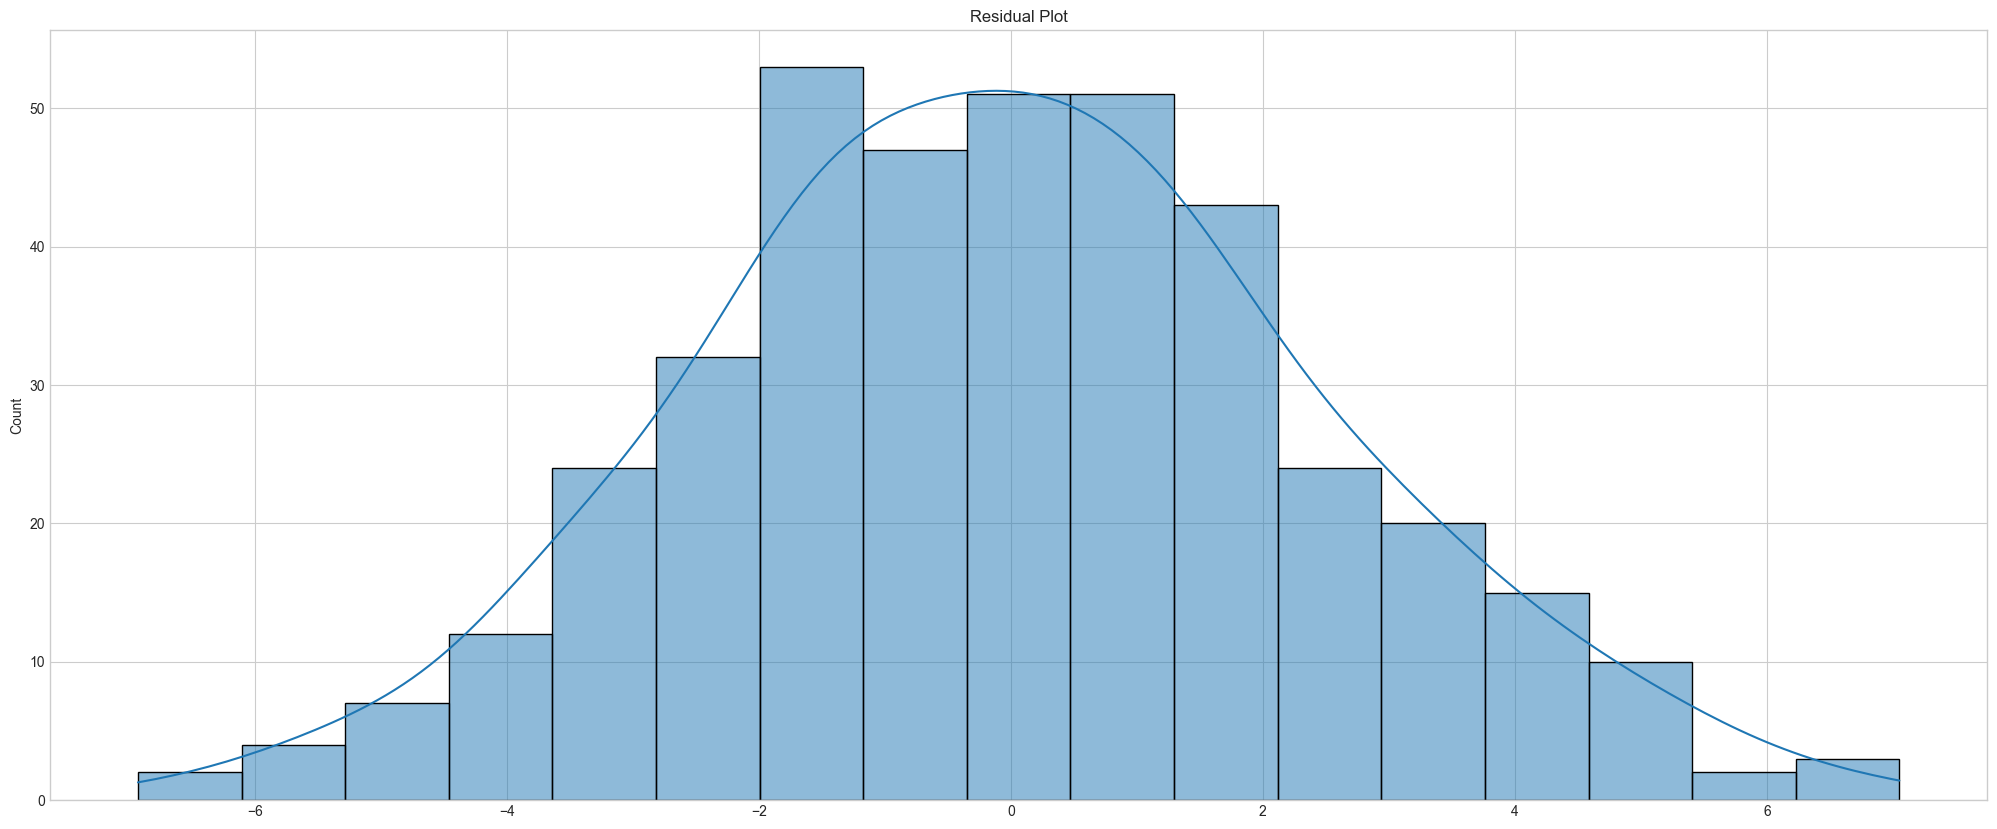

In [14]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
sns.histplot(residuals_1, kde = True) # residuals are normally distributed. Love it!!!
plt.title("Residual Plot")

In [15]:
reg_2 = ols(formula = 'Sales ~ Price + C(US)', data = CarSeats).fit()

In [16]:
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        11:32:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
predictions_2 = pd.DataFrame(reg_2.predict())
residuals_2 = CarSeats['Sales'] - predictions_2[0]

Text(0.5, 1.0, 'Residual Plot')

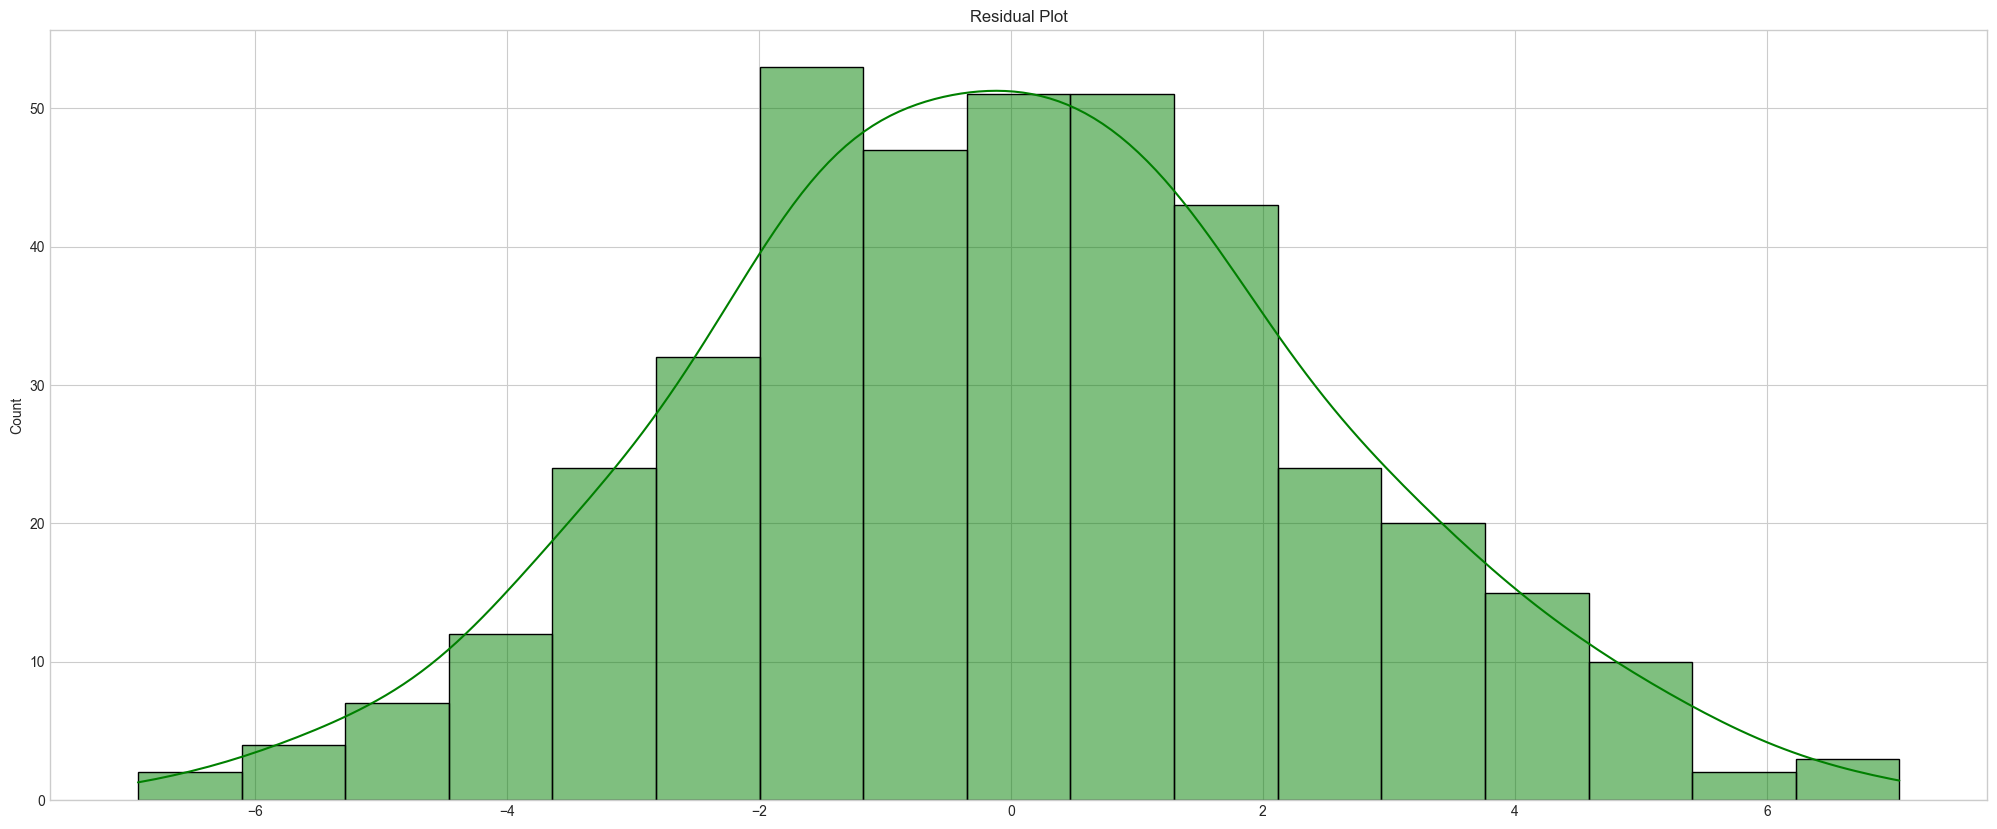

In [18]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
sns.histplot(residuals_2, color = 'green', kde = True) # residuals are normally distributed. Love it!!!
plt.title("Residual Plot")

In [19]:
# error calculations
Y = CarSeats['Sales']
Yhat_1 = predictions_1[0]
Yhat_2 = predictions_2[0]

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_1 = mean_absolute_error(Y, Yhat_1)
MSE_1 = mean_squared_error(Y, Yhat_1)
RMSE_1 = np.sqrt(MSE_1)

In [21]:
print("Model#1 Mean Absolute Error: %f" % MAE_1)
print("Model#1 Mean Squared Error : %f" % MSE_1)
print("Model#1 Root Mean Squared Error: %f" % RMSE_1)

Model#1 Mean Absolute Error: 1.959480
Model#1 Mean Squared Error : 6.052186
Model#1 Root Mean Squared Error: 2.460119


In [22]:
MAE_2 = mean_absolute_error(Y, Yhat_2)
MSE_2 = mean_squared_error(Y, Yhat_2)
RMSE_2 = np.sqrt(MSE_2)

In [23]:
print("Model#1 Mean Absolute Error: %f" % MAE_2)
print("Model#1 Mean Squared Error : %f" % MSE_2)
print("Model#1 Root Mean Squared Error: %f" % RMSE_2)

Model#1 Mean Absolute Error: 1.959480
Model#1 Mean Squared Error : 6.052186
Model#1 Root Mean Squared Error: 2.460119


**10.g. From the OLS results, these are the 95% confidence intervals:
<br>
Intercept: (11.790, 14.271)
<br>
US: (0.692, 1.708)
<br>
Price: (-0.065, -0.044)**

**10.h. Create plots and find evidence of outliers and high leverage observations**

In [24]:
yhat_resid_df = pd.concat({'yhat': Yhat_2, 'resid': pd.Series(reg_2.resid_pearson)}, axis=1)
yhat_resid_df

,yhat,resid
0,7.693120,0.731709
1,9.708792,0.611974
2,9.872225,0.076041
3,8.946105,-0.626106
4,6.057656,-0.772519
...,...,...
395,7.257299,2.151417
396,7.693120,-0.628947
397,5.568492,0.745732
398,9.055061,-1.261466


Text(0.5, 1.0, 'Residuals vs Fitted - Residuals_2')

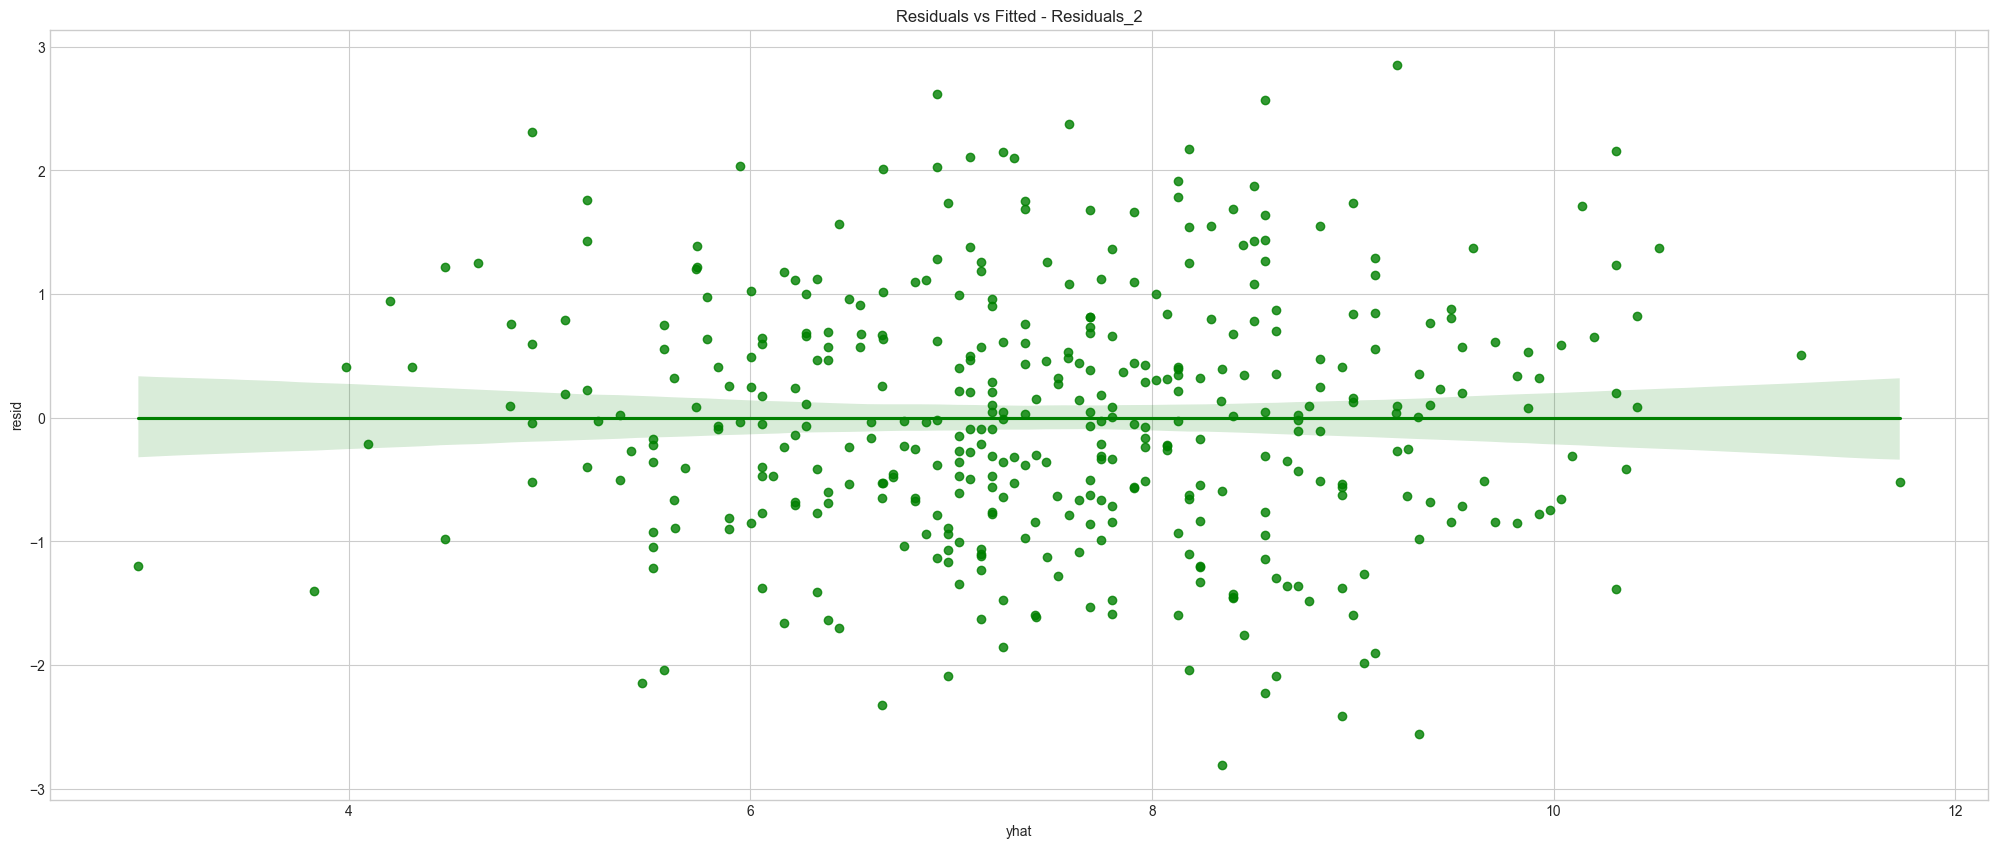

In [25]:
# residuals vs fitted plot
# plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot(x = 'yhat', y = 'resid', data = yhat_resid_df, fit_reg = True, color = 'g')
plt.title("Residuals vs Fitted - Residuals_2")

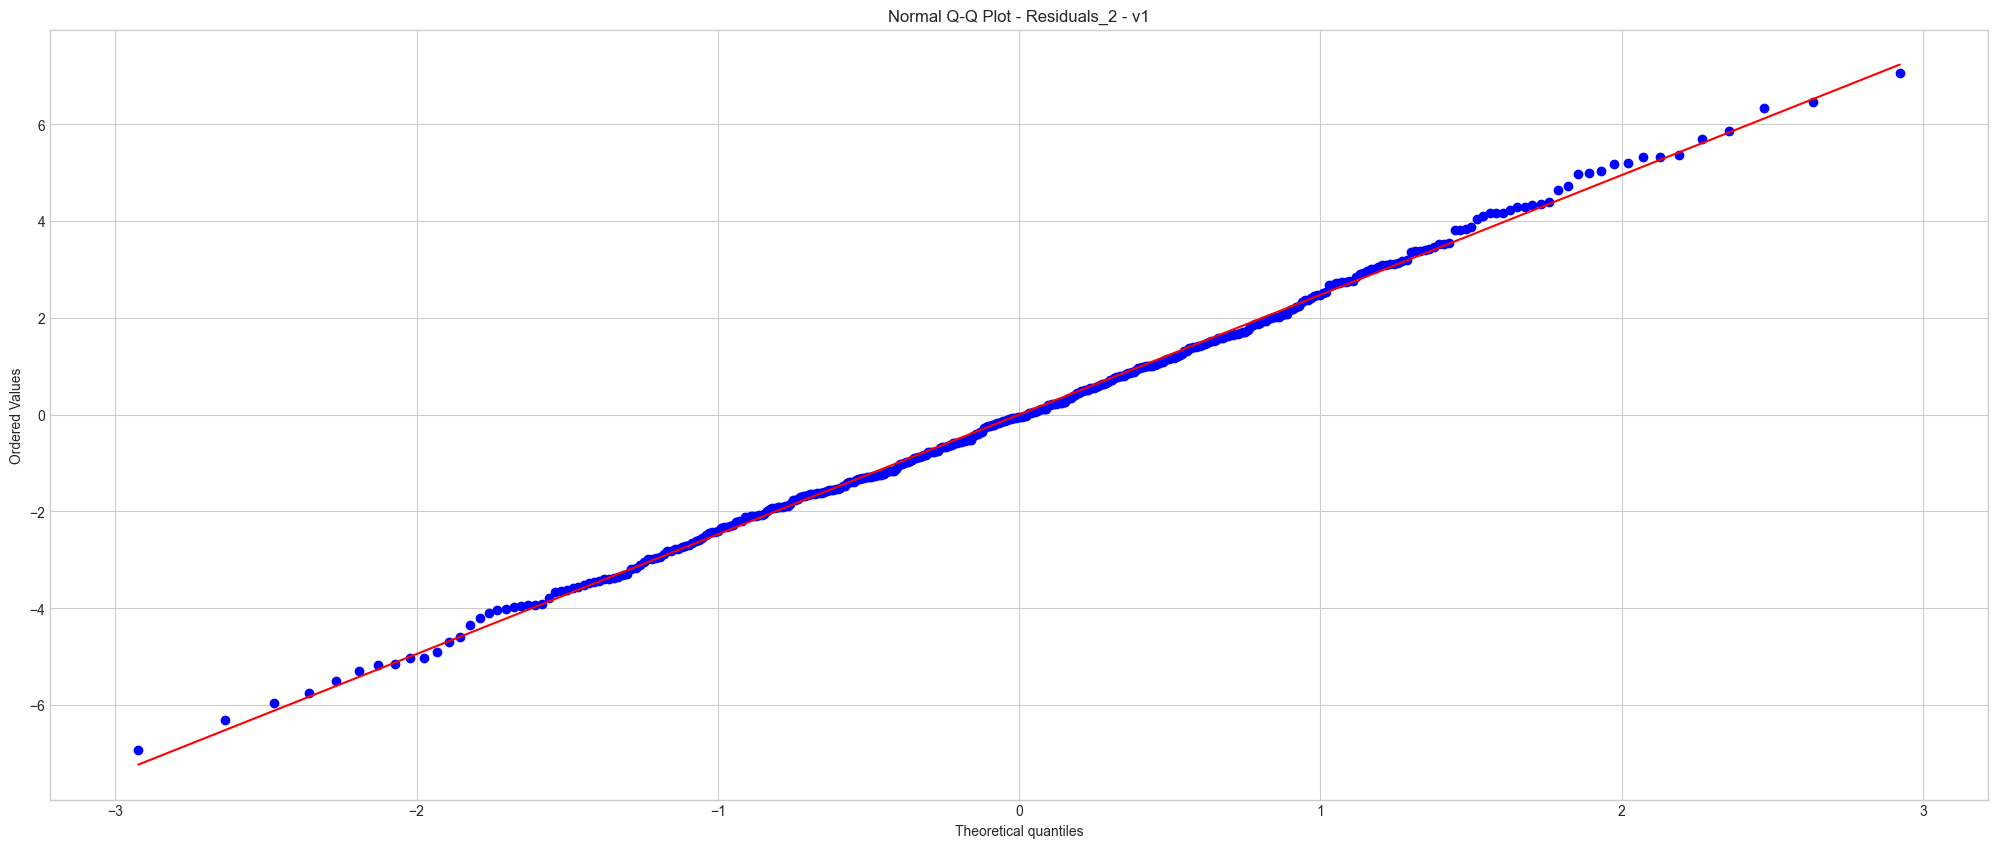

In [26]:
# normal q-q plot
# plt.xkcd()
plt.figure(figsize = (25, 10))
stats.probplot(residuals_2, plot = plt)
plt.title("Normal Q-Q Plot - Residuals_2 - v1")
plt.show()

<Figure size 2500x1000 with 0 Axes>

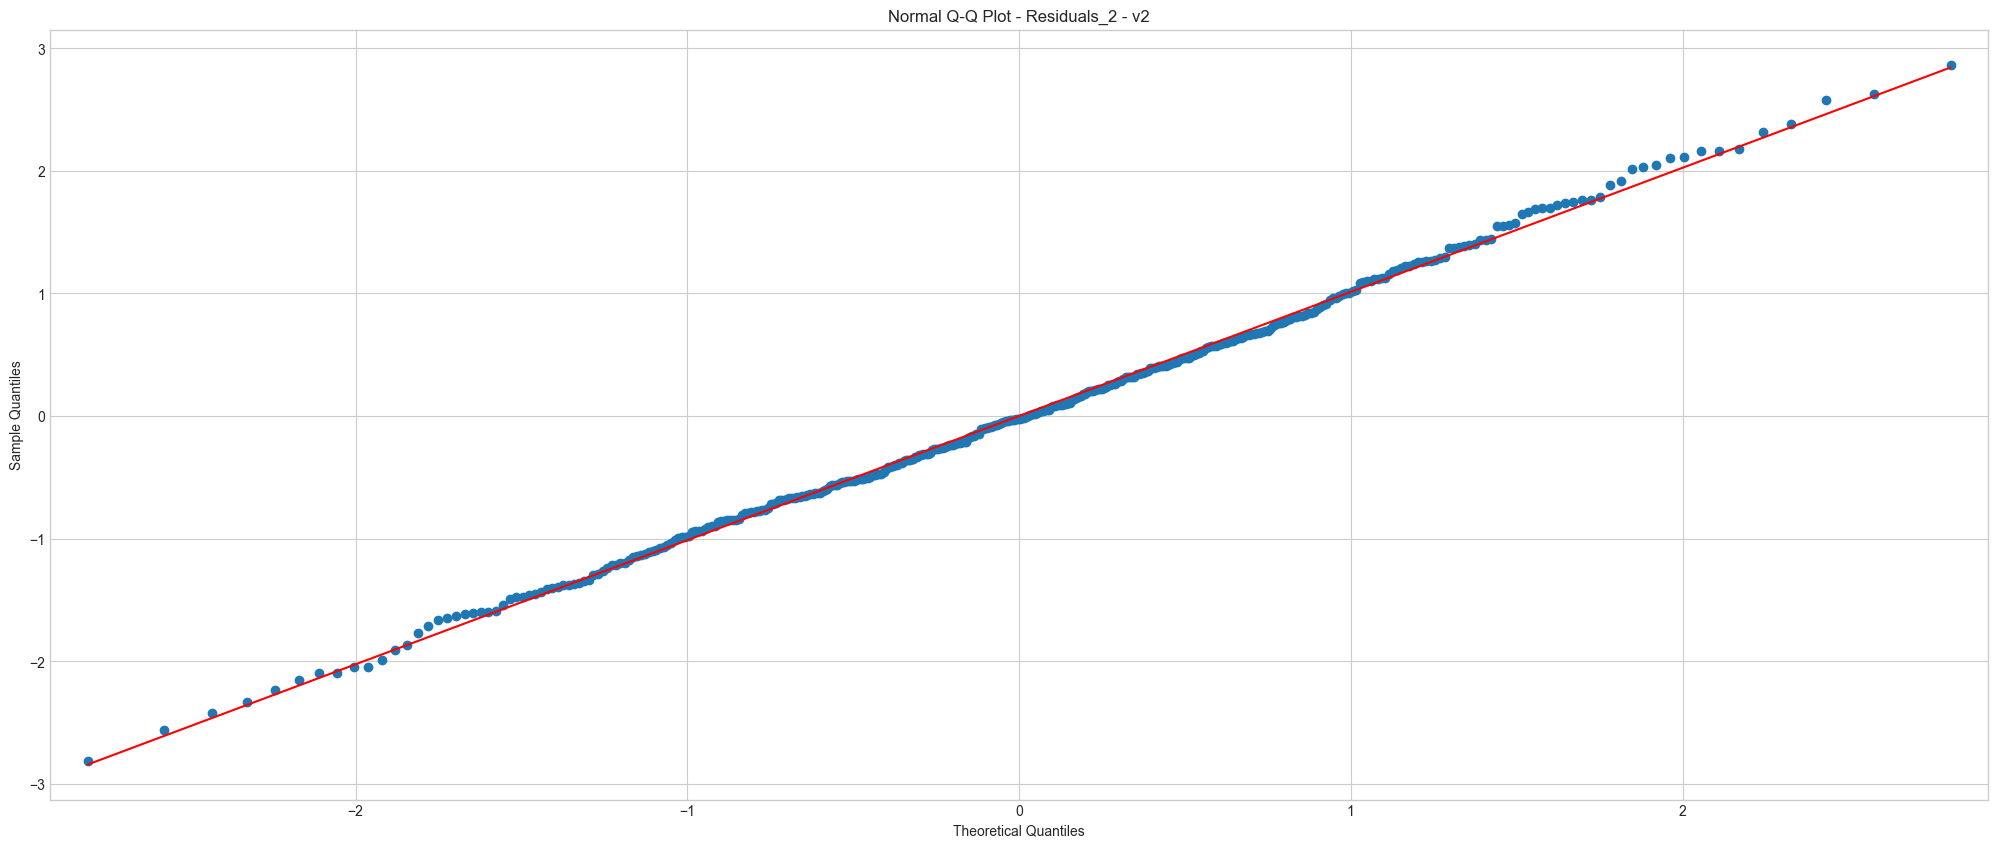

In [27]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
sm.qqplot(reg_2.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Normal Q-Q Plot - Residuals_2 - v2")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0.5, 1.0, 'Scale-Location Plot - Residuals_2')

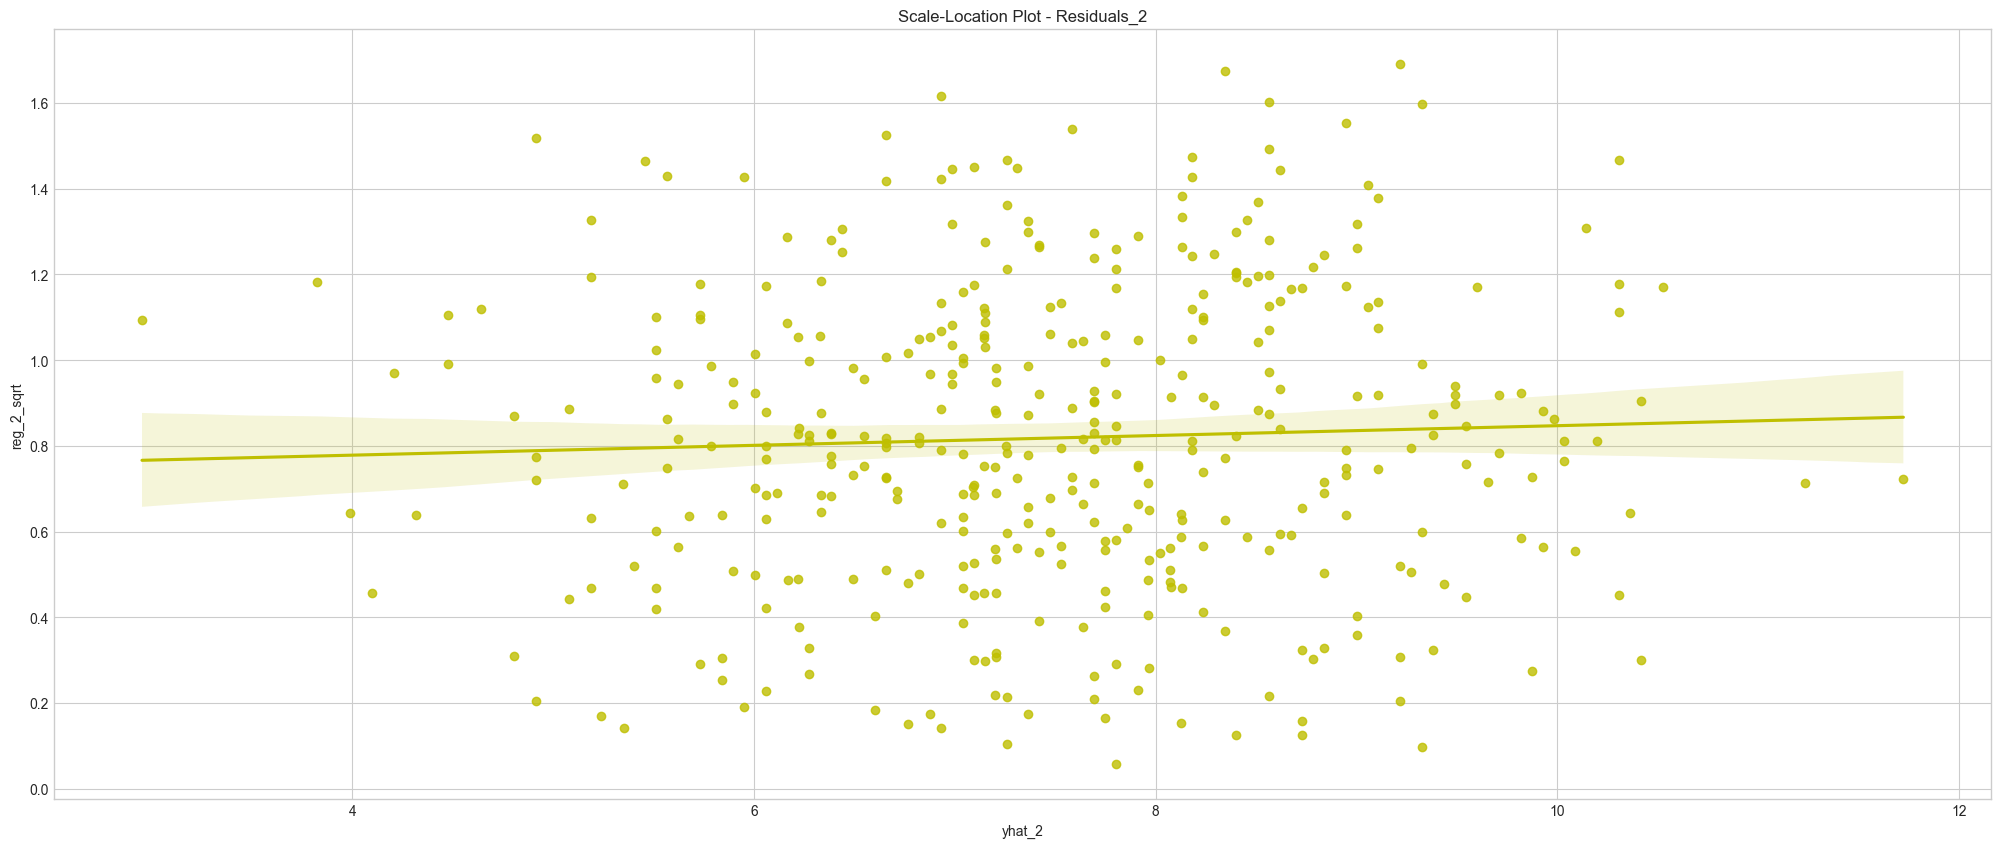

In [28]:
# scale-location plot
# plt.xkcd()
plt.figure(figsize = (25, 10))
reg_2_sqrt = pd.Series(np.sqrt(np.abs(reg_2.resid_pearson)))
yhat_2_reg_2_sqrt_df = pd.DataFrame({'yhat_2': Yhat_2, 'reg_2_sqrt': reg_2_sqrt})
sns.regplot(x = 'yhat_2', y = 'reg_2_sqrt', data = yhat_2_reg_2_sqrt_df, fit_reg = True, color = 'y')
plt.title("Scale-Location Plot - Residuals_2")

<Figure size 3000x1000 with 0 Axes>

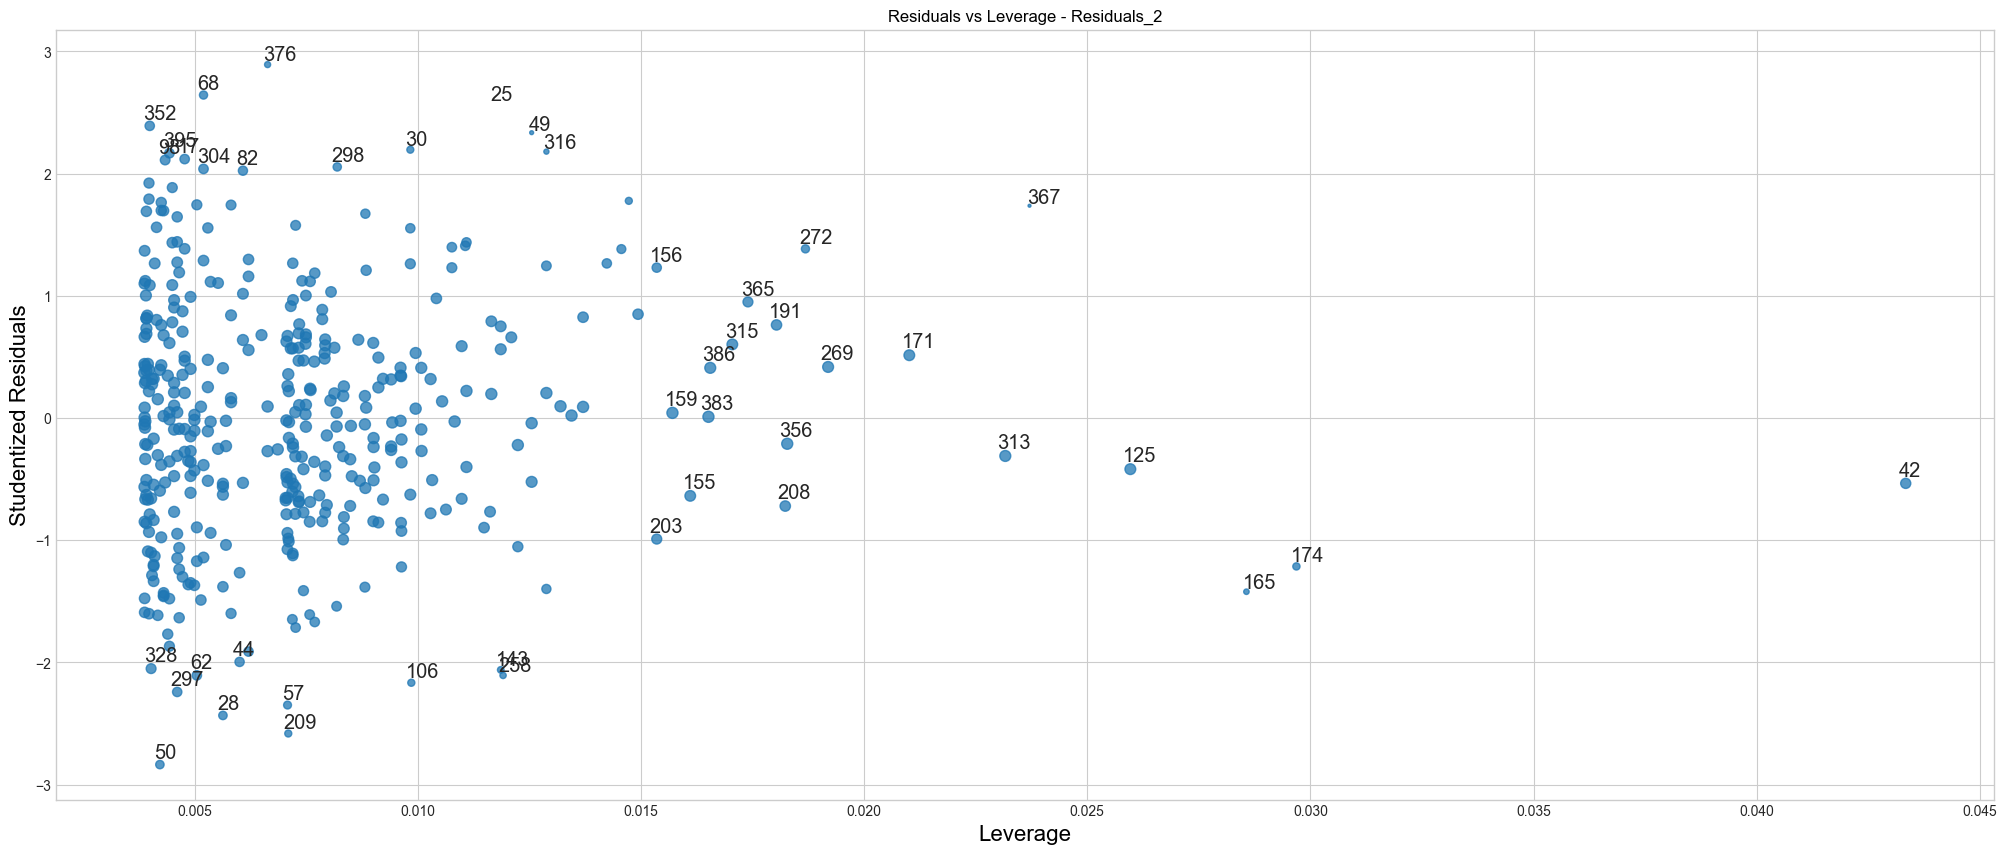

In [29]:
# residuals vs leverage plot
# plt.xkcd()
fig = plt.figure(figsize = (25, 10))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_2, criterion="cooks", size = 0.0002**2)
plt.title("Residuals vs Leverage - Residuals_2")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

**Yes, there are high leverage points. Point 42 is one such example.**